<a href="https://colab.research.google.com/github/Farmhouse121/Financial-Data-Science-in-Python/blob/main/Miscellaneous/Continuous_Time_Finance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from my_library import *

18:40:32 Starting...
18:40:32 Installing yfinance into Google notebook...
18:40:42 Installing arch into Google notebook...


/usr/local/lib/python3.10/dist-packages/yfinance/base.py:48: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  _empty_series = pd.Series()


18:40:56 Initialized.


In [71]:
ticker,begin,end='^GSPC','1928-01-27',today('%Y-%m-%d')
df=download(ticker,begin,end).dropna()
df.index=pd.DatetimeIndex(df.index).to_period('B')
df['Daily Return']=df['Adj Close'].pct_change()*hundred
df['Intraday Return']=df['Close']/df['Open']*hundred-hundred
df['Overnight Return']=(hundred+df["Daily Return"])/(hundred+df["Intraday Return"])*hundred-hundred
df['Week']=list(map(lambda x:pd.Period(x,'W'),df.index))
df['Month']=list(map(lambda x:pd.Period(x,'M'),df.index))
df['Year']=list(map(lambda x:pd.Period(x,'Y'),df.index))
df['Decade']=list(map(lambda x:(x.year//10)*10,df.index))
df['WeekDay']=df.index.weekday
df['MonthDay']=df.index.day
df['YearDay']=df.index.day_of_year
df['DecadeDay']=list(map(lambda x:(x-pd.Period("%d-01-01" % ((x.year//10)*10),'B')).n,df.index))
periods=['Week','Month','Year','Decade']

for p in periods:
    df['FirstDay'+p]=(df[p+'Day']<df[p+'Day'].shift())
    df['LastDay'+p]=(df[p+'Day'].shift(-1)<df[p+'Day'])

df.dropna(inplace=True)
df.loc[df["Volume"]==0,"Volume"]=np.nan
display(pd.concat([df.head(),df.tail()]).T)

[*********************100%%**********************]  1 of 1 completed


Date,1928-01-30,1928-01-31,1928-02-01,1928-02-02,1928-02-03,2024-01-19,2024-01-22,2024-01-23,2024-01-24,2024-01-25
Open,17.49,17.57,17.530001,17.629999,17.4,4796.279785,4853.419922,4856.799805,4888.560059,4886.660156
High,17.49,17.57,17.530001,17.629999,17.4,4842.069824,4868.410156,4866.47998,4903.680176,4898.149902
Low,17.49,17.57,17.530001,17.629999,17.4,4785.870117,4844.049805,4844.370117,4865.939941,4869.339844
Close,17.49,17.57,17.530001,17.629999,17.4,4839.810059,4850.430176,4864.600098,4868.549805,4894.160156
Adj Close,17.49,17.57,17.530001,17.629999,17.4,4839.810059,4850.430176,4864.600098,4868.549805,4894.160156
Volume,NaN,NaN,NaN,NaN,NaN,4287200000.0,4297610000.0,3912800000.0,4330030000.0,4020430000.0
Daily Return,-1.130587,0.457404,-0.227655,0.570442,-1.304592,1.23135,0.219433,0.292137,0.081193,0.526037
Intraday Return,0.0,0.0,0.0,0.0,0.0,0.907584,-0.061601,0.160606,-0.409328,0.153479
Overnight Return,-1.130587,0.457404,-0.227655,0.570442,-1.304592,0.320854,0.281207,0.131321,0.492537,0.371987
Week,1928-01-30/1928-02-05,1928-01-30/1928-02-05,1928-01-30/1928-02-05,1928-01-30/1928-02-05,1928-01-30/1928-02-05,2024-01-15/2024-01-21,2024-01-22/2024-01-28,2024-01-22/2024-01-28,2024-01-22/2024-01-28,2024-01-22/2024-01-28


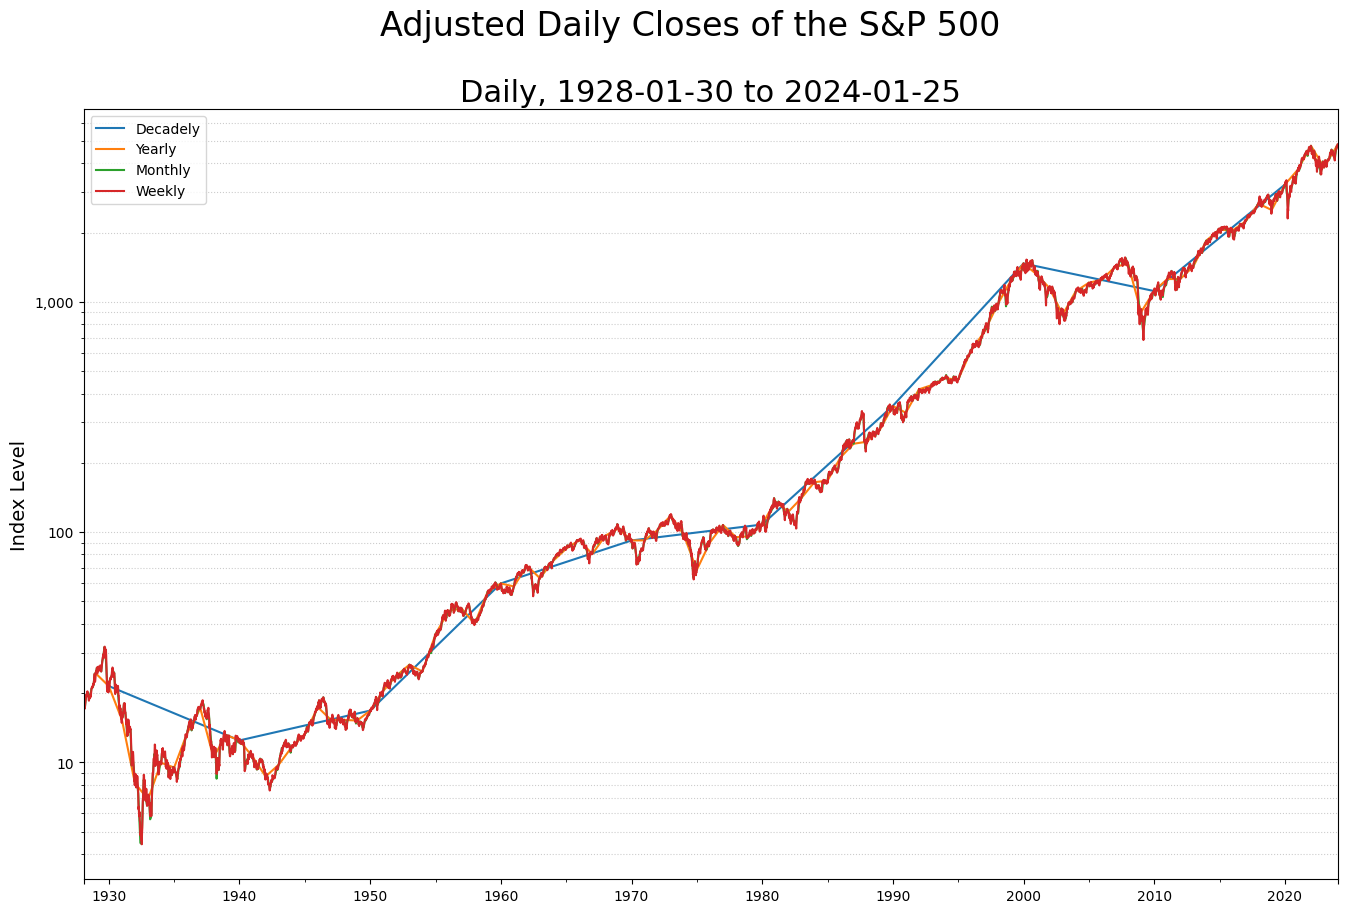

In [72]:
figure,plot=pl.subplots(figsize=(ten*GoldenRatio,ten))

for p in reversed(periods):
  df[df['LastDay'+p]][['Adj Close']].plot(ax=plot)

plot.legend([p+'ly' for p in reversed(periods)])
title='Adjusted Daily Closes of the S&P 500'
figure.suptitle(title,fontsize=24)
plot.set_title("Daily, %s to %s" % (df.index[0],df.index[-1]),fontsize=22)
plot.set_yscale('log')
plot.yaxis.set_major_formatter(CountLabels())
plot.set_ylabel('Index Level',fontsize=14)
plot.set_xlabel(None)
plot.grid(visible=True,which='both',axis='y',alpha=0.2,color='black',linestyle=':')
figure.savefig(title+".png",dpi=300,bbox_inches='tight')

,Length,Mean,St.Dev.,Skewness,Kurtosis,Scaled Mean,Scaled St.Dev.
Cadence,,,,,,,
Day,1.000000,0.030497,1.196659,-0.119804,20.222581,0.030497,1.196659
Week,4.814696,0.213425,2.206774,0.037802,10.172129,0.044290,1.005711
Month,20.912402,0.486212,5.197788,-0.027459,10.349710,0.023196,1.136623
Year,248.577320,7.437627,18.768387,-0.486782,3.147104,0.028865,1.190409
Decade,2192.000000,113.932334,132.871457,0.310894,1.176812,0.034700,2.837994


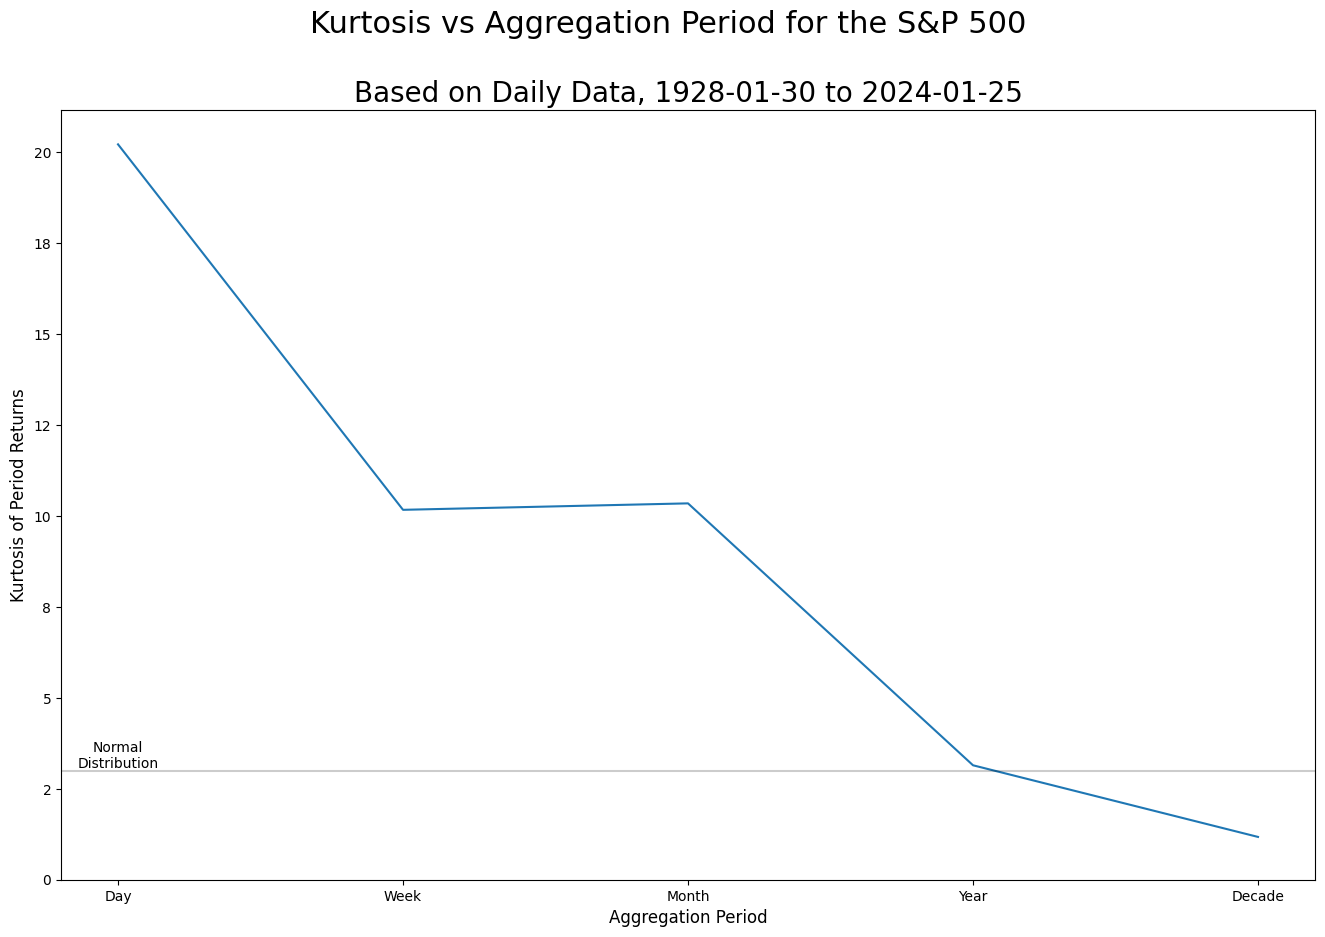

In [89]:
summary=pd.DataFrame({'Cadence':["Day"]+periods}).set_index('Cadence')
summary.loc["Day","Length"]=one
summary.loc["Day","Mean"]=df["Daily Return"].mean()
summary.loc["Day","St.Dev."]=df["Daily Return"].std()
summary.loc["Day","Skewness"]=df["Daily Return"].skew()
summary.loc["Day","Kurtosis"]=df["Daily Return"].kurt()+three

for p in periods:
    pf=pd.DataFrame({
        "Period":df[df["FirstDay"+p]][p],
        "FirstDay":df.index[df["FirstDay"+p]],
        "FirstClose":df[df["FirstDay"+p]]["Adj Close"]
    }).set_index("Period").join(pd.DataFrame({
        "Period":df[df["LastDay"+p]][p],
        "LastDay":df.index[df["LastDay"+p]],
        "LastClose":df[df["LastDay"+p]]["Adj Close"]
    }).set_index("Period"))
    pf["Return"]=pf["LastClose"]/pf["FirstClose"]*hundred-hundred
    summary.loc[p,'Mean']=pf["Return"].mean()
    summary.loc[p,'Length']=df[[p,p+"Day"]].groupby(p).count().mean().values[0]
    summary.loc[p,'St.Dev.']=pf["Return"].std()
    summary.loc[p,'Skewness']=pf["Return"].skew()
    summary.loc[p,'Kurtosis']=pf["Return"].kurt()+three

summary['Scaled Mean']=np.power(one+summary["Mean"]/hundred,one/summary["Length"])*hundred-hundred
summary['Scaled St.Dev.']=summary['St.Dev.']/np.sqrt(summary["Length"])
display(summary)

figure,plot=pl.subplots(figsize=(ten*GoldenRatio,ten))
plot.plot(summary.index,summary["Kurtosis"],'-')
plot.set_ylim(zero,None)
plot.axhline(three,color='black',alpha=0.2)
plot.yaxis.set_major_formatter(CountLabels())
title="Kurtosis vs Aggregation Period for the S&P 500"
figure.suptitle(title,fontsize=22)
plot.set_title("Based on Daily Data, %s to %s" % (df.index[0],df.index[-1]),fontsize=20)
plot.text("Day",three,"Normal\nDistribution",ha='center',va='bottom',fontsize=10)
plot.set_xlabel("Aggregation Period",fontsize=12)
plot.set_ylabel("Kurtosis of Period Returns",fontsize=12)
figure.savefig(title+".png",dpi=300,bbox_inches='tight')